<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/P4_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Líneal


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Lista de palabras positivas que identificarás en las reseñas
positive_words = ["good", "like", "excellent", "great", "amazing", "happy", "love", "nice", "best", "well", "satisfied"]

# Crear una columna que cuente el número de palabras positivas en cada reseña
df['positive_word_count'] = df['cleaned_review_content'].apply(lambda x: sum(word in x for word in positive_words))

# Preparar las variables para la regresión
X = df['positive_word_count']  # Variable independiente
y = df['adjusted_rating']  # Variable dependiente

# Agregar una constante a la variable independiente (necesario para statsmodels)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen de la regresión
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        adjusted_rating   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     70.66
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           1.06e-16
Time:                        17:13:00   Log-Likelihood:                -243.58
No. Observations:                1351   AIC:                             491.2
Df Residuals:                    1349   BIC:                             501.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.9530    

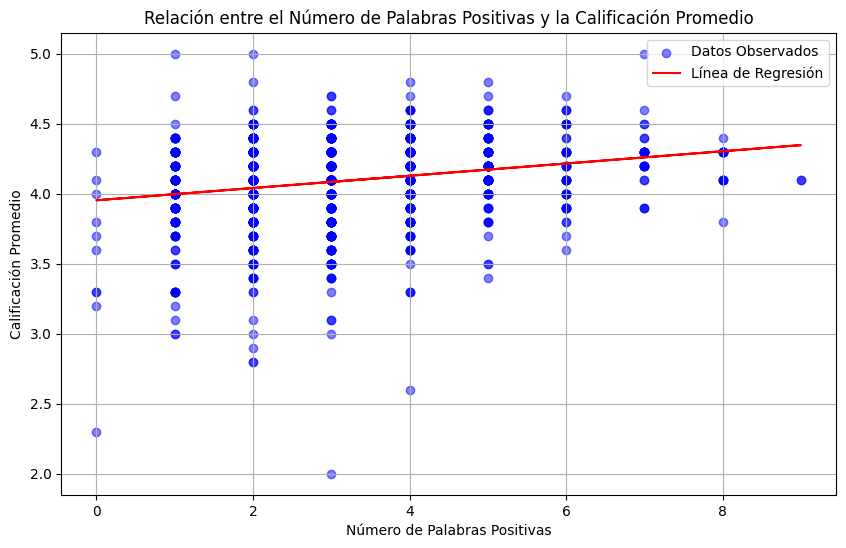

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las variables
X = df['positive_word_count']
y = df['adjusted_rating']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos Observados')

# Añadir la línea de regresión
# La línea de regresión es y = b0 + b1 * X, donde b0 es la constante y b1 es el coeficiente
b0 = model.params['const']
b1 = model.params['positive_word_count']
plt.plot(X, b0 + b1 * X, color='red', label='Línea de Regresión')

# Añadir títulos y etiquetas
plt.title('Relación entre el Número de Palabras Positivas y la Calificación Promedio')
plt.xlabel('Número de Palabras Positivas')
plt.ylabel('Calificación Promedio')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
